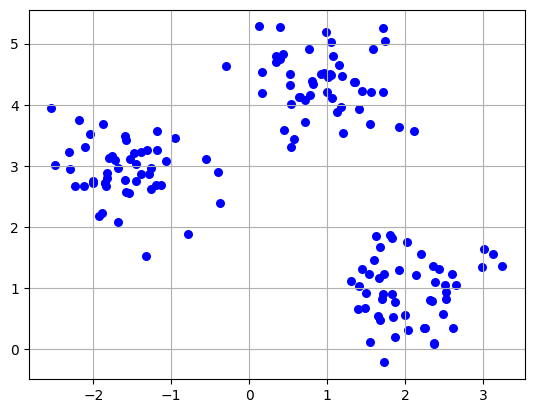

In [ ]:
from sklearn.datasets import make_blobs
X,y= make_blobs(n_samples=150, n_features=2, centers=3,
                cluster_std=0.5, shuffle=True,random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c='blue', marker='o', s=30)
plt.grid()
plt.show()


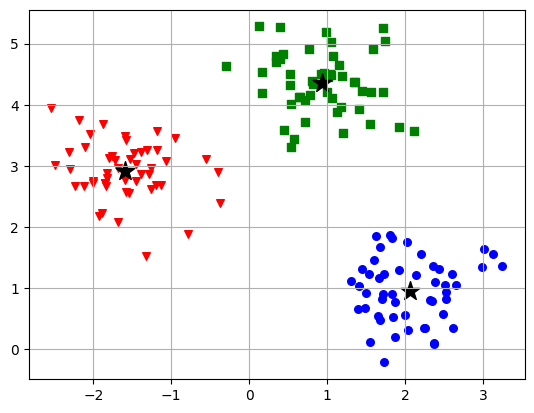

In [ ]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3,init='random',n_init=10,max_iter=300, random_state=0)
y_km= km.fit_predict(X)
plt.scatter(X[y_km == 0,0],X[y_km== 0,1], s=30, c='green',
            marker='s', label="cluster1")
plt.scatter(X[y_km == 1,0],X[y_km== 1,1], s=30, c='blue',marker='o',
            label="cluster2")

plt.scatter(X[y_km == 2,0],X[y_km== 2,1], s=30, c='red',marker='v',
            label="cluster3")
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=200, marker="*", c="black", label="centroids")
plt.grid()
plt.show()



In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means_clustering(data, k, max_iterations=100):
    num_samples, num_features = data.shape
    centroids = data[np.random.choice(num_samples, k, replace=False)]

    for _ in range(max_iterations):
        # Assign data points to the nearest centroid
        cluster_assignments = []
        for i in range(num_samples):
            distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
            cluster_assignments.append(np.argmin(distances))

        # Update centroids
        new_centroids = np.zeros((k, num_features))
        cluster_counts = np.zeros(k)
        for i in range(num_samples):
            cluster = cluster_assignments[i]
            new_centroids[cluster] += data[i]
            cluster_counts[cluster] += 1
        for j in range(k):
            if cluster_counts[j] > 0:
                new_centroids[j] /= cluster_counts[j]
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return cluster_assignments, centroids
# Example usage:
if __name__ == "__main__":
    # Sample data (replace this with your data)
    data = np.array([[1, 2],
                     [1.5, 1.8],
                     [8, 8],
                     [9, 9],
                     [1, 0.7],
                     [9, 13]])
    # Number of clusters (k)
    k = 2

    # Perform k-means clustering
    cluster_assignments, centroids = k_means_clustering(data, k)
    print("Cluster Assignments:", cluster_assignments)
    print("Centroids:", centroids)

Cluster Assignments: [1, 1, 0, 0, 1, 0]
Centroids: [[ 8.66666667 10.        ]
 [ 1.16666667  1.5       ]]


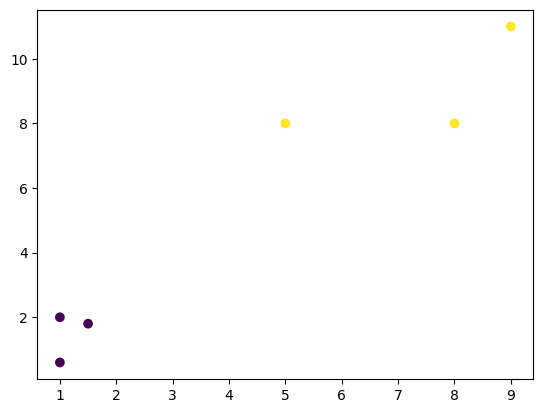

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],c=cluster_assignments)
plt.show()